In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Bibliothèques chargées avec succès !")

#chargons les données 
file_path = '../data/raw/jobs_filtered.csv'
df = pd.read_csv(file_path)

print("=" * 80)
print(" DATA LOADED SUCCESSFULLY AM3ELEM ")
print("=" * 80)
print(f"Shape: {df.shape}")
print(f"Colonnes: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())
      

 Bibliothèques chargées avec succès !
 DATA LOADED SUCCESSFULLY AM3ELEM 
Shape: (123849, 6)
Colonnes: ['job_id', 'title', 'description', 'location', 'formatted_experience_level', 'skill_name']

First 5 rows:
     job_id                                              title  \
0    921716                              Marketing Coordinator   
1   1829192                  Mental Health Therapist/Counselor   
2  10998357                        Assitant Restaurant Manager   
3  23221523  Senior Elder Law / Trusts and Estates Associat...   
4  35982263                                 Service Technician   

                                         description           location  \
0  Job descriptionA leading real estate firm in N...      Princeton, NJ   
1  At Aspen Therapy and Wellness , we are committ...   Fort Collins, CO   
2  The National Exemplar is accepting application...     Cincinnati, OH   
3  Senior Associate Attorney - Elder Law / Trusts...  New Hyde Park, NY   
4  Looking for HVAC 

In [2]:
print("\n" + "=" * 80)
print("TEST 1 : LONGUEURS DES DESCRIPTIONS")
print("=" * 80)

df['desc_len'] = df['description'].astype(str).apply(len)
df['desc_words'] = df['description'].astype(str).apply(lambda x: len(x.split()))

print("\n Statistiques sur les caractères :")
print(df['desc_len'].describe())

print("\n Statistiques sur les mots :")
print(df['desc_words'].describe())

print("\n Distribution en quartiles (caractères) :")
print(df['desc_len'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]))


TEST 1 : LONGUEURS DES DESCRIPTIONS

 Statistiques sur les caractères :
count    123849.000000
mean       3766.251492
std        2146.618367
min           2.000000
25%        2176.000000
50%        3435.000000
75%        4986.000000
max       23201.000000
Name: desc_len, dtype: float64

 Statistiques sur les mots :
count    123849.000000
mean        523.027986
std         301.940590
min           1.000000
25%         298.000000
50%         477.000000
75%         696.000000
max        3400.000000
Name: desc_words, dtype: float64

 Distribution en quartiles (caractères) :
0.25    2176.0
0.50    3435.0
0.75    4986.0
0.90    6584.0
0.95    7688.2
Name: desc_len, dtype: float64


In [ ]:
print("\n" + "=" * 80)
print("TEST 2 : DISTRIBUTION GÉOGRAPHIQUE")
print("=" * 80)

print(f"\n🌍 Nombre de locations uniques : {df['location'].nunique()}")
print(f"Total offres : {len(df)}")
print(f"📊 Moyenne offres par location : {len(df) / df['location'].nunique():.1f}")

print("\nTOP 50 LOCATIONS :")
print(df['location'].value_counts().head(50))

print("\nBOTTOM 20 (locations rares) :")
print(df['location'].value_counts().tail(20))


TEST 2 : DISTRIBUTION GÉOGRAPHIQUE

🌍 Nombre de locations uniques : 8526
📍 Total offres : 123849
📊 Moyenne offres par location : 14.5

🏆 TOP 50 LOCATIONS :
location
United States                      8125
New York, NY                       2756
Chicago, IL                        1834
Houston, TX                        1762
Dallas, TX                         1383
Atlanta, GA                        1363
Boston, MA                         1176
Austin, TX                         1083
Charlotte, NC                      1075
Phoenix, AZ                        1059
Washington, DC                      985
Los Angeles, CA                     972
San Francisco, CA                   884
New York City Metropolitan Area     837
Seattle, WA                         818
San Diego, CA                       790
Denver, CO                          787
Philadelphia, PA                    711
Tampa, FL                           659
Miami, FL                           643
San Antonio, TX                   


TEST 3 : DISTRIBUTION PAR DOMAINE (skill_name)

📊 Nombre de domaines uniques : 3775

🎯 TOP 30 DOMAINES :
 1. Health Care Provider                     :   15989 offres (12.91%)
 2. Management Manufacturing                 :   15763 offres (12.73%)
 3. Other                                    :   10108 offres ( 8.16%)
 4. Sales Business Development               :    9208 offres ( 7.43%)
 5. Information Technology                   :    8974 offres ( 7.25%)
 6. Engineering Information Technology       :    7816 offres ( 6.31%)
 7. Finance Sales                            :    3083 offres ( 2.49%)
 8. Administrative                           :    2978 offres ( 2.40%)
 9. Accounting/Auditing Finance              :    2614 offres ( 2.11%)
10. Human Resources                          :    2120 offres ( 1.71%)
11. Business Development Sales               :    1899 offres ( 1.53%)
12. Marketing Sales                          :    1868 offres ( 1.51%)
13. Legal                                 

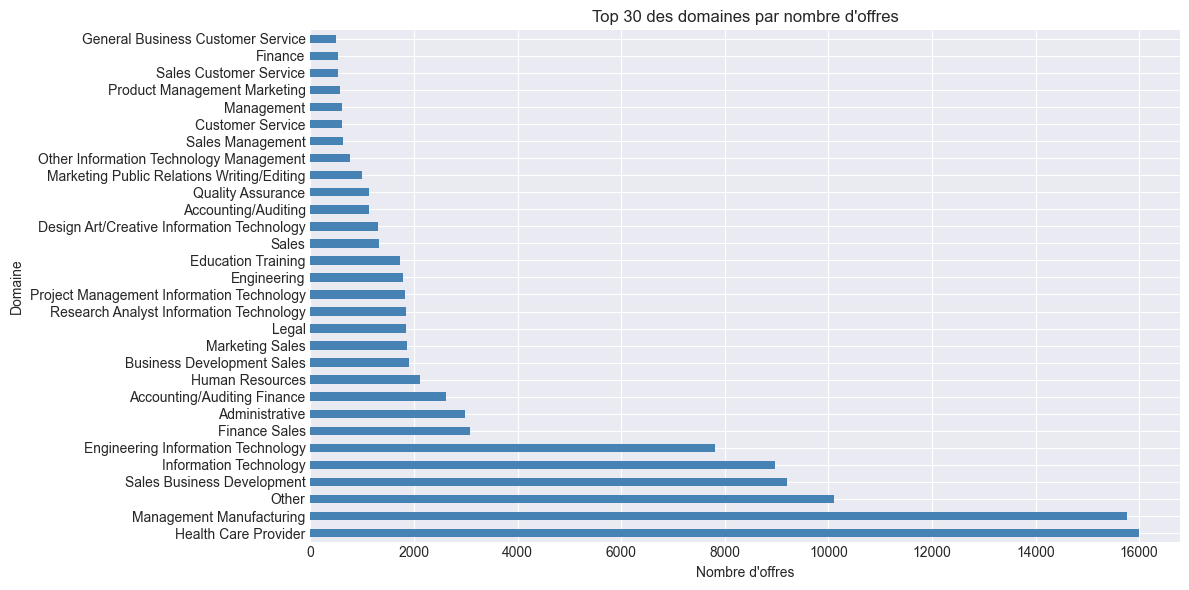

In [7]:
print("\n" + "=" * 80)
print("TEST 3 : DISTRIBUTION PAR DOMAINE (skill_name)")
print("=" * 80)

print(f"\n📊 Nombre de domaines uniques : {df['skill_name'].nunique()}")

print("\n🎯 TOP 30 DOMAINES :")
skill_counts = df['skill_name'].value_counts()
for i, (skill, count) in enumerate(skill_counts.head(30).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {skill:40s} : {count:7d} offres ({percentage:5.2f}%)")

print("\n📈 Visualisation :")
plt.figure(figsize=(12, 6))
skill_counts.head(30).plot(kind='barh', color='steelblue')
plt.xlabel('Nombre d\'offres')
plt.ylabel('Domaine')
plt.title('Top 30 des domaines par nombre d\'offres')
plt.tight_layout()
plt.show()

In [8]:
print("\n" + "=" * 80)
print("TEST 4 : NIVEAU D'EXPÉRIENCE")
print("=" * 80)

print(f"\n📊 Valeurs manquantes : {df['formatted_experience_level'].isna().sum()} / {len(df)}")
print(f"Pourcentage vide : {(df['formatted_experience_level'].isna().sum() / len(df)) * 100:.1f}%")

print("\n🎯 Distribution (si données présentes) :")
if df['formatted_experience_level'].notna().sum() > 0:
    print(df['formatted_experience_level'].value_counts())
else:
    print("⚠️ Aucune donnée dans cette colonne → ON VA LA SUPPRIMER")


TEST 4 : NIVEAU D'EXPÉRIENCE

📊 Valeurs manquantes : 29409 / 123849
Pourcentage vide : 23.7%

🎯 Distribution (si données présentes) :
formatted_experience_level
Mid-Senior level    41489
Entry level         36708
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64



ANALYSE APPROFONDIE : HEALTHCARE

📊 STATISTIQUES GLOBALES :
   Nombre total d'offres Healthcare : 15989
   Pourcentage du dataset : 12.91%

--------------------------------------------------------------------------------
1️⃣ DISTRIBUTION GÉOGRAPHIQUE (Healthcare)
--------------------------------------------------------------------------------
   Locations uniques : 3335
   Moyenne offres/location : 4.8

   🏆 TOP 20 LOCATIONS Healthcare :
    1. United States                       :   231 offres ( 1.44%)
    2. Boston, MA                          :   156 offres ( 0.98%)
    3. Chicago, IL                         :   128 offres ( 0.80%)
    4. Charlotte, NC                       :   122 offres ( 0.76%)
    5. New York, NY                        :   105 offres ( 0.66%)
    6. Houston, TX                         :   105 offres ( 0.66%)
    7. San Antonio, TX                     :   103 offres ( 0.64%)
    8. Clinton, NC                         :    95 offres ( 0.59%)
    9. Winston-Salem,

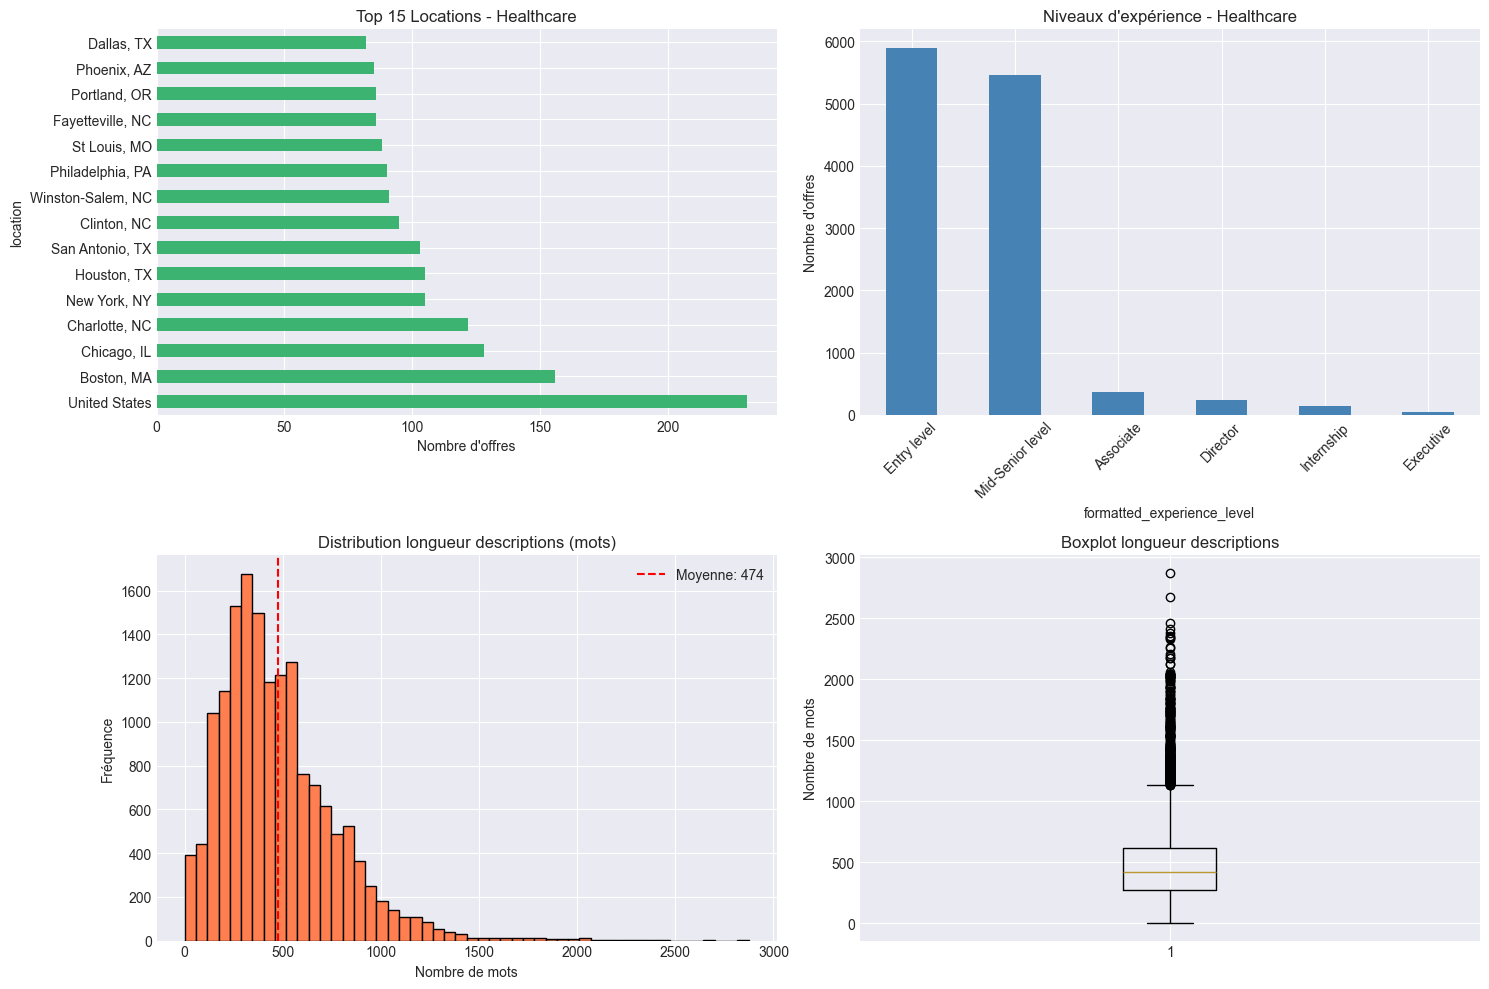


✅ ANALYSE TERMINÉE


In [9]:
print("\n" + "=" * 80)
print("ANALYSE APPROFONDIE : HEALTHCARE")
print("=" * 80)

# Filtrer Healthcare
healthcare = df[df['skill_name'] == 'Health Care Provider']

print(f"\n📊 STATISTIQUES GLOBALES :")
print(f"   Nombre total d'offres Healthcare : {len(healthcare)}")
print(f"   Pourcentage du dataset : {(len(healthcare) / len(df)) * 100:.2f}%")

# 1. ANALYSE DES LOCATIONS
print("\n" + "-" * 80)
print("1️⃣ DISTRIBUTION GÉOGRAPHIQUE (Healthcare)")
print("-" * 80)
print(f"   Locations uniques : {healthcare['location'].nunique()}")
print(f"   Moyenne offres/location : {len(healthcare) / healthcare['location'].nunique():.1f}")

print("\n   🏆 TOP 20 LOCATIONS Healthcare :")
top_locations = healthcare['location'].value_counts().head(20)
for i, (loc, count) in enumerate(top_locations.items(), 1):
    percentage = (count / len(healthcare)) * 100
    print(f"   {i:2d}. {loc:35s} : {count:5d} offres ({percentage:5.2f}%)")

# 2. ANALYSE DES NIVEAUX D'EXPÉRIENCE
print("\n" + "-" * 80)
print("2️⃣ NIVEAUX D'EXPÉRIENCE (Healthcare)")
print("-" * 80)

exp_missing = healthcare['formatted_experience_level'].isna().sum()
exp_present = healthcare['formatted_experience_level'].notna().sum()

print(f"   Valeurs manquantes : {exp_missing} ({(exp_missing/len(healthcare))*100:.1f}%)")
print(f"   Valeurs présentes  : {exp_present} ({(exp_present/len(healthcare))*100:.1f}%)")

if exp_present > 0:
    print("\n   📊 Distribution des niveaux d'expérience :")
    exp_counts = healthcare['formatted_experience_level'].value_counts()
    for level, count in exp_counts.items():
        percentage = (count / len(healthcare)) * 100
        print(f"   {level:25s} : {count:5d} offres ({percentage:5.2f}%)")

# 3. ANALYSE DES DESCRIPTIONS
print("\n" + "-" * 80)
print("3️⃣ QUALITÉ DES DESCRIPTIONS (Healthcare)")
print("-" * 80)

healthcare_desc = healthcare['description'].astype(str)
desc_lengths = healthcare_desc.apply(len)
desc_words = healthcare_desc.apply(lambda x: len(x.split()))

print(f"   Moyenne caractères : {desc_lengths.mean():.0f}")
print(f"   Moyenne mots       : {desc_words.mean():.0f}")
print(f"   Min mots           : {desc_words.min():.0f}")
print(f"   Max mots           : {desc_words.max():.0f}")

print("\n   Distribution par quartiles (mots) :")
quartiles = desc_words.quantile([0.25, 0.5, 0.75, 0.9])
for q, val in quartiles.items():
    print(f"   {int(q*100):3d}% : {val:6.0f} mots")

# 4. EXEMPLES CONCRETS
print("\n" + "-" * 80)
print("4️⃣ EXEMPLES CONCRETS (Healthcare)")
print("-" * 80)

samples = healthcare.sample(3, random_state=42)

for i, (idx, row) in enumerate(samples.iterrows(), 1):
    print(f"\n   EXEMPLE #{i}")
    print(f"   {'-' * 76}")
    print(f"   Job ID      : {row['job_id']}")
    print(f"   Title       : {row['title']}")
    print(f"   Location    : {row['location']}")
    print(f"   Experience  : {row['formatted_experience_level']}")
    print(f"   Description : {row['description'][:200]}...")

# 5. VISUALISATION
print("\n" + "-" * 80)
print("5️⃣ VISUALISATION")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graph 1: Top locations
top_locations.head(15).plot(kind='barh', ax=axes[0, 0], color='mediumseagreen')
axes[0, 0].set_title('Top 15 Locations - Healthcare')
axes[0, 0].set_xlabel('Nombre d\'offres')

# Graph 2: Niveaux d'expérience
if exp_present > 0:
    exp_counts.plot(kind='bar', ax=axes[0, 1], color='steelblue')
    axes[0, 1].set_title('Niveaux d\'expérience - Healthcare')
    axes[0, 1].set_ylabel('Nombre d\'offres')
    axes[0, 1].tick_params(axis='x', rotation=45)

# Graph 3: Distribution des longueurs
axes[1, 0].hist(desc_words, bins=50, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution longueur descriptions (mots)')
axes[1, 0].set_xlabel('Nombre de mots')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].axvline(desc_words.mean(), color='red', linestyle='--', label=f'Moyenne: {desc_words.mean():.0f}')
axes[1, 0].legend()

# Graph 4: Boxplot longueurs
axes[1, 1].boxplot(desc_words, vert=True)
axes[1, 1].set_title('Boxplot longueur descriptions')
axes[1, 1].set_ylabel('Nombre de mots')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ ANALYSE TERMINÉE")
print("=" * 80)


EXPLORATION AVANCÉE : TOUS LES JOBS HEALTHCARE (multi-critères)

📊 COMPARAISON DES MÉTHODES :
Méthode                                      Offres   % du total
--------------------------------------------------------------------------------
1. Par skill_name uniquement                  15989       12.91%
2. Par mots-clés dans title                   21095       17.03%
3. NOUVELLES offres trouvées (titre only)       8679        7.01%
4. TOTAL COMBINÉ (skill + title)              24668       19.92%

--------------------------------------------------------------------------------
🔍 DANS QUELS 'skill_name' SE CACHAIENT CES OFFRES ?
--------------------------------------------------------------------------------
Other                                              :  1701 (19.60%)
Management Manufacturing                           :   809 ( 9.32%)
Legal                                              :   722 ( 8.32%)
Research Analyst Information Technology            :   515 ( 5.93%)
Engineering

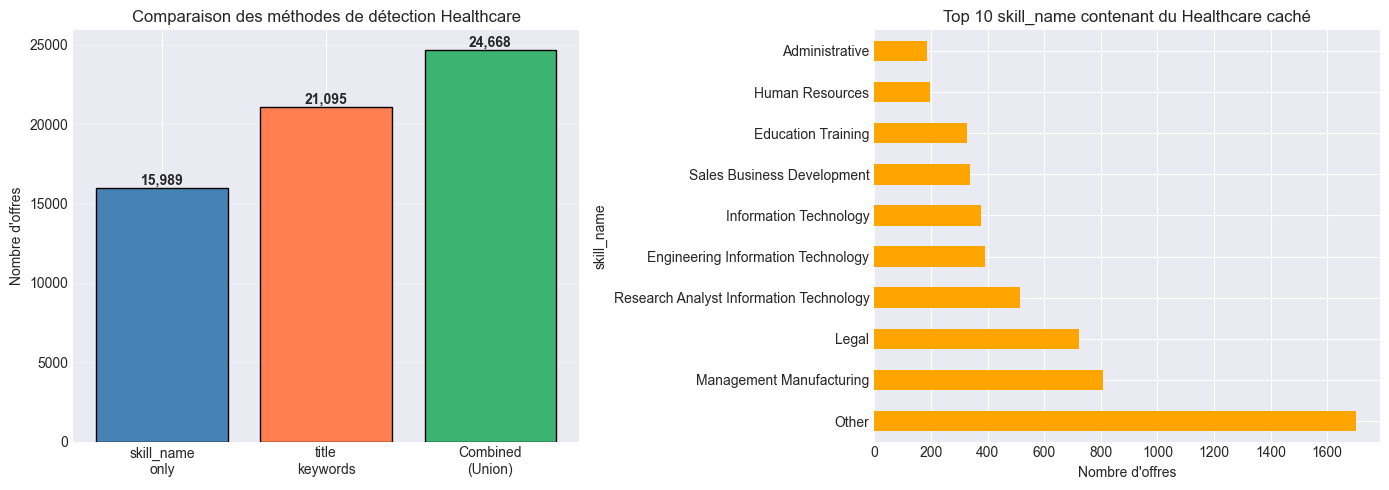


✅ ANALYSE TERMINÉE


In [10]:
print("\n" + "=" * 80)
print("EXPLORATION AVANCÉE : TOUS LES JOBS HEALTHCARE (multi-critères)")
print("=" * 80)

# Mots-clés Healthcare dans les titres
healthcare_keywords = [
    'nurse', 'rn', 'lpn', 'medical', 'health', 'hospital', 'clinical',
    'physician', 'doctor', 'therapist', 'care', 'patient', 'pharmacy',
    'dental', 'mental health', 'counselor', 'social worker', 'dietitian',
    'radiologic', 'respiratory', 'occupational therapy', 'physical therapy',
    'emergency', 'paramedic', 'healthcare', 'practitioner', 'clinician'
]

# Fonction de recherche
def contains_healthcare_keyword(title):
    if pd.isna(title):
        return False
    title_lower = str(title).lower()
    return any(keyword in title_lower for keyword in healthcare_keywords)

# Appliquer la recherche
df['is_healthcare_title'] = df['title'].apply(contains_healthcare_keyword)

# Compter
healthcare_by_title = df[df['is_healthcare_title'] == True]
healthcare_by_skill = df[df['skill_name'] == 'Health Care Provider']

print(f"\n📊 COMPARAISON DES MÉTHODES :")
print(f"{'Méthode':<40} {'Offres':>10} {'% du total':>12}")
print("-" * 80)
print(f"{'1. Par skill_name uniquement':<40} {len(healthcare_by_skill):>10} {(len(healthcare_by_skill)/len(df)*100):>11.2f}%")
print(f"{'2. Par mots-clés dans title':<40} {len(healthcare_by_title):>10} {(len(healthcare_by_title)/len(df)*100):>11.2f}%")

# Trouver les offres UNIQUEMENT trouvées par titre (pas dans skill_name)
only_in_title = healthcare_by_title[~healthcare_by_title['job_id'].isin(healthcare_by_skill['job_id'])]

print(f"{'3. NOUVELLES offres trouvées (titre only)':<40} {len(only_in_title):>10} {(len(only_in_title)/len(df)*100):>11.2f}%")

# Union des deux
healthcare_combined = df[(df['is_healthcare_title'] == True) | (df['skill_name'] == 'Health Care Provider')]
print(f"{'4. TOTAL COMBINÉ (skill + title)':<40} {len(healthcare_combined):>10} {(len(healthcare_combined)/len(df)*100):>11.2f}%")

# Analyser les skill_name des nouvelles offres trouvées
print("\n" + "-" * 80)
print("🔍 DANS QUELS 'skill_name' SE CACHAIENT CES OFFRES ?")
print("-" * 80)

if len(only_in_title) > 0:
    hidden_skills = only_in_title['skill_name'].value_counts().head(15)
    for skill, count in hidden_skills.items():
        percentage = (count / len(only_in_title)) * 100
        print(f"{skill:50s} : {count:5d} ({percentage:5.2f}%)")

# Exemples de ces offres "cachées"
print("\n" + "-" * 80)
print("📋 EXEMPLES D'OFFRES HEALTHCARE TROUVÉES HORS 'Health Care Provider'")
print("-" * 80)

if len(only_in_title) > 0:
    samples = only_in_title.sample(min(5, len(only_in_title)), random_state=42)
    
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"\n   EXEMPLE #{i}")
        print(f"   {'-' * 76}")
        print(f"   Job ID      : {row['job_id']}")
        print(f"   Title       : {row['title']}")
        print(f"   Skill_name  : {row['skill_name']}")  # ← Regarder où il était catégorisé
        print(f"   Location    : {row['location']}")
        print(f"   Experience  : {row['formatted_experience_level']}")

# Visualisation
print("\n" + "-" * 80)
print("📊 VISUALISATION COMPARATIVE")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Comparaison des méthodes
methods = ['skill_name\nonly', 'title\nkeywords', 'Combined\n(Union)']
counts = [len(healthcare_by_skill), len(healthcare_by_title), len(healthcare_combined)]
colors = ['steelblue', 'coral', 'mediumseagreen']

axes[0].bar(methods, counts, color=colors, edgecolor='black')
axes[0].set_ylabel('Nombre d\'offres')
axes[0].set_title('Comparaison des méthodes de détection Healthcare')
axes[0].grid(axis='y', alpha=0.3)

for i, (method, count) in enumerate(zip(methods, counts)):
    axes[0].text(i, count + 200, f'{count:,}', ha='center', fontweight='bold')

# Graph 2: Top skill_name des offres cachées
if len(only_in_title) > 0 and len(hidden_skills) > 0:
    hidden_skills.head(10).plot(kind='barh', ax=axes[1], color='orange')
    axes[1].set_title('Top 10 skill_name contenant du Healthcare caché')
    axes[1].set_xlabel('Nombre d\'offres')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ ANALYSE TERMINÉE")
print("=" * 80)


EXPLORATION : AUTRES DOMAINES NICHÉS

LEGAL
   Offres trouvées par titre : 1545 (1.25%)
   → Manager, Sales Marketing (Law) (Sales Business Development)
   → Attorney (Legal)

FINANCE
   Offres trouvées par titre : 4716 (3.81%)
   → CHIEF FINANCIAL OFFICER / CONTROLLER (Finance Strategy/Planning Accounting/Auditing)
   → Accountant III (Accounting/Auditing)

EDUCATION
   Offres trouvées par titre : 1482 (1.20%)
   → Teacher (Education Training)
   → Middle School Math Teacher (Education)

MARKETING
   Offres trouvées par titre : 2807 (2.27%)
   → Event Marketing Specialist (Project Management Marketing)
   → Marketing Assistant (Marketing Public Relations Customer Service)


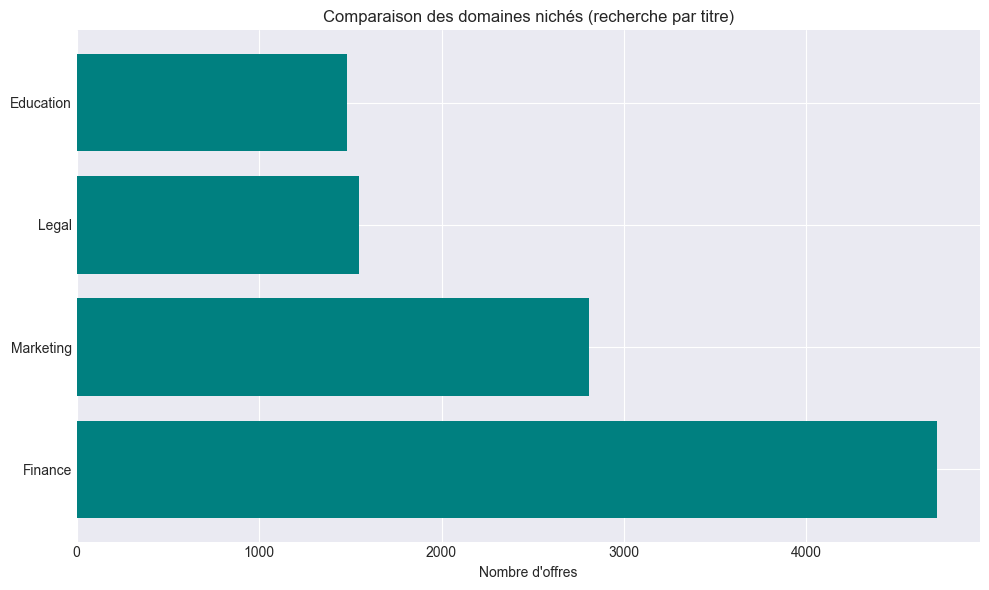

In [11]:
print("\n" + "=" * 80)
print("EXPLORATION : AUTRES DOMAINES NICHÉS")
print("=" * 80)

# Définir des domaines à explorer
domains_to_explore = {
    'Legal': ['legal', 'attorney', 'lawyer', 'paralegal', 'law'],
    'Finance': ['finance', 'financial', 'accountant', 'accounting', 'audit', 'cpa'],
    'Education': ['teacher', 'education', 'professor', 'instructor', 'tutor', 'academic'],
    'Marketing': ['marketing', 'brand', 'social media', 'seo', 'content', 'advertising']
}

results = {}

for domain, keywords in domains_to_explore.items():
    # Recherche par titre
    mask = df['title'].astype(str).str.lower().str.contains('|'.join(keywords), regex=True, na=False)
    count = mask.sum()
    results[domain] = count
    
    print(f"\n{domain.upper()}")
    print(f"   Offres trouvées par titre : {count} ({count/len(df)*100:.2f}%)")
    
    # Exemples
    if count > 0:
        samples = df[mask].sample(min(2, count), random_state=42)
        for idx, row in samples.iterrows():
            print(f"   → {row['title']} ({row['skill_name']})")

# Comparaison visuelle
plt.figure(figsize=(10, 6))
domains_sorted = sorted(results.items(), key=lambda x: x[1], reverse=True)
domains_names = [d[0] for d in domains_sorted]
domains_counts = [d[1] for d in domains_sorted]

plt.barh(domains_names, domains_counts, color='teal')
plt.xlabel('Nombre d\'offres')
plt.title('Comparaison des domaines nichés (recherche par titre)')
plt.tight_layout()
plt.show()


EXPLORATION MAXIMALE : HEALTHCARE (Titre + Description)
🔍 Recherche avec 49 mots-clés

⏳ Recherche dans les titres...
⏳ Recherche dans les descriptions (peut prendre 30-60 secondes)...
✅ Recherche terminée !

📊 RÉSULTATS PAR NIVEAU DE CONFIANCE
🟢 High     (Titre + Description      ) :    8447 offres (  6.82%)
🟡 Medium   (Titre OU skill_name      ) :   13144 offres ( 10.61%)
🟠 Low      (Description seulement    ) :   89171 offres ( 72.00%)
⚪ None     (Pas Healthcare           ) :   13087 offres ( 10.57%)

--------------------------------------------------------------------------------
📈 TOTAL HEALTHCARE (High + Medium + Low) : 110,762 offres (89.43%)

📊 COMPARAISON DES MÉTHODES DE DÉTECTION

skill_name uniquement          :   15989 offres ( 12.91%)
Titre uniquement               :   21527 offres ( 17.38%)
Description uniquement         :  110504 offres ( 89.22%)
Titre OU Description           :  110698 offres ( 89.38%)
High + Medium confidence       :   21591 offres ( 17.43%)

⚠️ ANALY

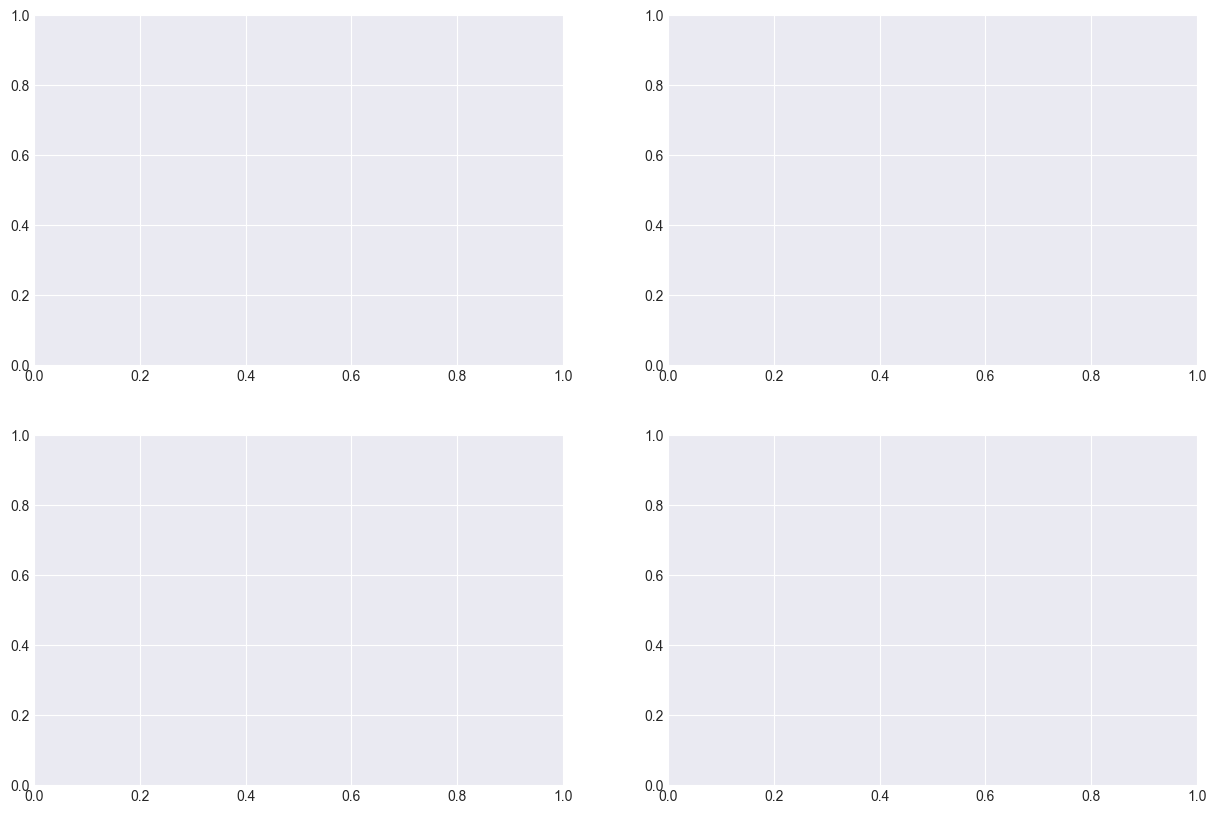

In [12]:
print("\n" + "=" * 80)
print("EXPLORATION MAXIMALE : HEALTHCARE (Titre + Description)")
print("=" * 80)

# Mots-clés Healthcare (élargis)
healthcare_keywords = [
    # Professions médicales
    'nurse', 'rn', 'lpn', 'cna', 'physician', 'doctor', 'surgeon', 'md',
    # Thérapies
    'therapist', 'therapy', 'physical therapy', 'occupational therapy', 
    'speech therapy', 'mental health', 'counselor', 'psychologist',
    # Services médicaux
    'medical', 'clinical', 'health', 'healthcare', 'hospital', 'clinic',
    'patient care', 'emergency', 'paramedic', 'emt',
    # Spécialités
    'pharmacy', 'pharmacist', 'dental', 'dentist', 'radiology', 'radiologic',
    'laboratory', 'pathology', 'anesthesia', 'cardiology', 'oncology',
    # Support médical
    'medical assistant', 'nursing assistant', 'home health', 'hospice',
    'rehabilitation', 'diagnostic', 'practitioners', 'clinician',
    # Social/Mental
    'social worker', 'case manager', 'behavioral health', 'psychiatric'
]

print(f"🔍 Recherche avec {len(healthcare_keywords)} mots-clés\n")

# Créer le pattern regex (plus efficace)
pattern = '|'.join(healthcare_keywords)

# Recherche dans titre (rapide)
print("⏳ Recherche dans les titres...")
df['healthcare_in_title'] = df['title'].astype(str).str.lower().str.contains(pattern, regex=True, na=False)

# Recherche dans description (plus lent - prévenir l'utilisateur)
print("⏳ Recherche dans les descriptions (peut prendre 30-60 secondes)...")
df['healthcare_in_desc'] = df['description'].astype(str).str.lower().str.contains(pattern, regex=True, na=False)

print("✅ Recherche terminée !\n")

# Catégorisation par niveau de confiance
df['healthcare_confidence'] = 'None'

# HAUTE confiance : dans titre ET description
df.loc[(df['healthcare_in_title']) & (df['healthcare_in_desc']), 'healthcare_confidence'] = 'High'

# MOYENNE confiance : dans titre OU skill_name = Health Care Provider
df.loc[
    ((df['healthcare_in_title']) & (~df['healthcare_in_desc'])) | 
    (df['skill_name'] == 'Health Care Provider'),
    'healthcare_confidence'
] = 'Medium'

# BASSE confiance : seulement dans description (peut être faux positif)
df.loc[(~df['healthcare_in_title']) & (df['healthcare_in_desc']), 'healthcare_confidence'] = 'Low'

# Statistiques
print("=" * 80)
print("📊 RÉSULTATS PAR NIVEAU DE CONFIANCE")
print("=" * 80)

total_healthcare = len(df[df['healthcare_confidence'] != 'None'])

confidence_stats = df['healthcare_confidence'].value_counts()
for conf in ['High', 'Medium', 'Low', 'None']:
    if conf in confidence_stats.index:
        count = confidence_stats[conf]
        percentage = (count / len(df)) * 100
        
        if conf == 'High':
            emoji = "🟢"
            desc = "Titre + Description"
        elif conf == 'Medium':
            emoji = "🟡"
            desc = "Titre OU skill_name"
        elif conf == 'Low':
            emoji = "🟠"
            desc = "Description seulement"
        else:
            emoji = "⚪"
            desc = "Pas Healthcare"
            
        print(f"{emoji} {conf:8s} ({desc:25s}) : {count:7d} offres ({percentage:6.2f}%)")

print("\n" + "-" * 80)
print(f"📈 TOTAL HEALTHCARE (High + Medium + Low) : {total_healthcare:,} offres ({total_healthcare/len(df)*100:.2f}%)")
print("=" * 80)

# Comparaison des méthodes
print("\n📊 COMPARAISON DES MÉTHODES DE DÉTECTION\n")

method_counts = {
    'skill_name uniquement': len(df[df['skill_name'] == 'Health Care Provider']),
    'Titre uniquement': len(df[df['healthcare_in_title']]),
    'Description uniquement': len(df[df['healthcare_in_desc']]),
    'Titre OU Description': len(df[(df['healthcare_in_title']) | (df['healthcare_in_desc'])]),
    'High + Medium confidence': len(df[df['healthcare_confidence'].isin(['High', 'Medium'])])
}

for method, count in method_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{method:30s} : {count:7d} offres ({percentage:6.2f}%)")

# Analyse des offres LOW confidence (potentiels faux positifs)
print("\n" + "=" * 80)
print("⚠️ ANALYSE DES OFFRES 'LOW CONFIDENCE' (faux positifs potentiels)")
print("=" * 80)

low_conf = df[df['healthcare_confidence'] == 'Low']

if len(low_conf) > 0:
    print(f"\nNombre d'offres Low confidence : {len(low_conf)}")
    print(f"\n🔍 Leurs skill_name (top 10) :")
    
    low_skills = low_conf['skill_name'].value_counts().head(10)
    for skill, count in low_skills.items():
        print(f"   {skill:50s} : {count:5d}")
    
    print(f"\n📋 EXEMPLES (pour vérifier si c'est vraiment Healthcare) :")
    samples = low_conf.sample(min(5, len(low_conf)), random_state=42)
    
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"\n   EXEMPLE #{i}")
        print(f"   {'-' * 76}")
        print(f"   Title       : {row['title']}")
        print(f"   Skill_name  : {row['skill_name']}")
        print(f"   Description : {row['description'][:250]}...")

# Dataset Healthcare final recommandé
print("\n" + "=" * 80)
print("✅ RECOMMANDATION FINALE")
print("=" * 80)

high_medium = df[df['healthcare_confidence'].isin(['High', 'Medium'])]

print(f"\n🎯 Dataset Healthcare recommandé : HIGH + MEDIUM confidence")
print(f"   Nombre d'offres : {len(high_medium):,}")
print(f"   Pourcentage du dataset total : {len(high_medium)/len(df)*100:.2f}%")
print(f"\n   Raison : Maximise les vraies offres Healthcare tout en limitant les faux positifs")

# Visualisation
print("\n📊 Génération des graphiques...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graph 1: Comparaison des

In [13]:
print("\n" + "=" * 80)
print("CRÉATION DU DATASET FINAL - HEALTHCARE")
print("=" * 80)

# Filtrer High + Medium confidence
healthcare_final = df[df['healthcare_confidence'].isin(['High', 'Medium'])].copy()

print(f"✅ Dataset Healthcare final : {len(healthcare_final):,} offres")

# Sauvegarder
output_path = '../data/processed/healthcare_jobs.csv'
healthcare_final.to_csv(output_path, index=False)
print(f"✅ Sauvegardé : {output_path}")

# Statistiques finales
print("\n" + "-" * 80)
print("📊 STATISTIQUES FINALES")
print("-" * 80)
print(f"Locations uniques    : {healthcare_final['location'].nunique()}")
print(f"Niveaux d'expérience : {healthcare_final['formatted_experience_level'].nunique()}")
print(f"Longueur moyenne desc: {healthcare_final['description'].astype(str).apply(lambda x: len(x.split())).mean():.0f} mots")

# Preview
print("\n📋 APERÇU DES 5 PREMIÈRES OFFRES :")
print(healthcare_final[['job_id', 'title', 'location', 'formatted_experience_level']].head())


CRÉATION DU DATASET FINAL - HEALTHCARE
✅ Dataset Healthcare final : 21,591 offres
✅ Sauvegardé : ../data/processed/healthcare_jobs.csv

--------------------------------------------------------------------------------
📊 STATISTIQUES FINALES
--------------------------------------------------------------------------------
Locations uniques    : 3828
Niveaux d'expérience : 6
Longueur moyenne desc: 501 mots

📋 APERÇU DES 5 PREMIÈRES OFFRES :
       job_id                                              title  \
1     1829192                  Mental Health Therapist/Counselor   
3    23221523  Senior Elder Law / Trusts and Estates Associat...   
5    91700727           Economic Development and Planning Intern   
8     1218575                              Respiratory Therapist   
20  117675818                                Physician Assistant   

             location formatted_experience_level  
1    Fort Collins, CO                        NaN  
3   New Hyde Park, NY                        Na


PHASE 1 : NETTOYAGE GLOBAL SAFE (avant filtrage Healthcare)
📊 Dataset original : 123,849 offres

--------------------------------------------------------------------------------
1️⃣ IDENTIFICATION DES DOMAINES NON-HEALTHCARE
--------------------------------------------------------------------------------
⚠️ Offres avec skill_name clairement non-Healthcare : 82

📋 Top 10 de ces domaines :
skill_name
Production Manufacturing           57
Quality Assurance Manufacturing    25
Name: count, dtype: int64

--------------------------------------------------------------------------------
2️⃣ IDENTIFICATION PAR TITRES EXPLICITES
--------------------------------------------------------------------------------
⚠️ Offres avec titres clairement non-Healthcare : 11,768

📋 EXEMPLES (pour validation) :
 1. RF Assembly                                                  (Analyst Engineering Other)
 2. FT Produce Sales Associate                                   (Sales Business Development)
 3. Lead Full S

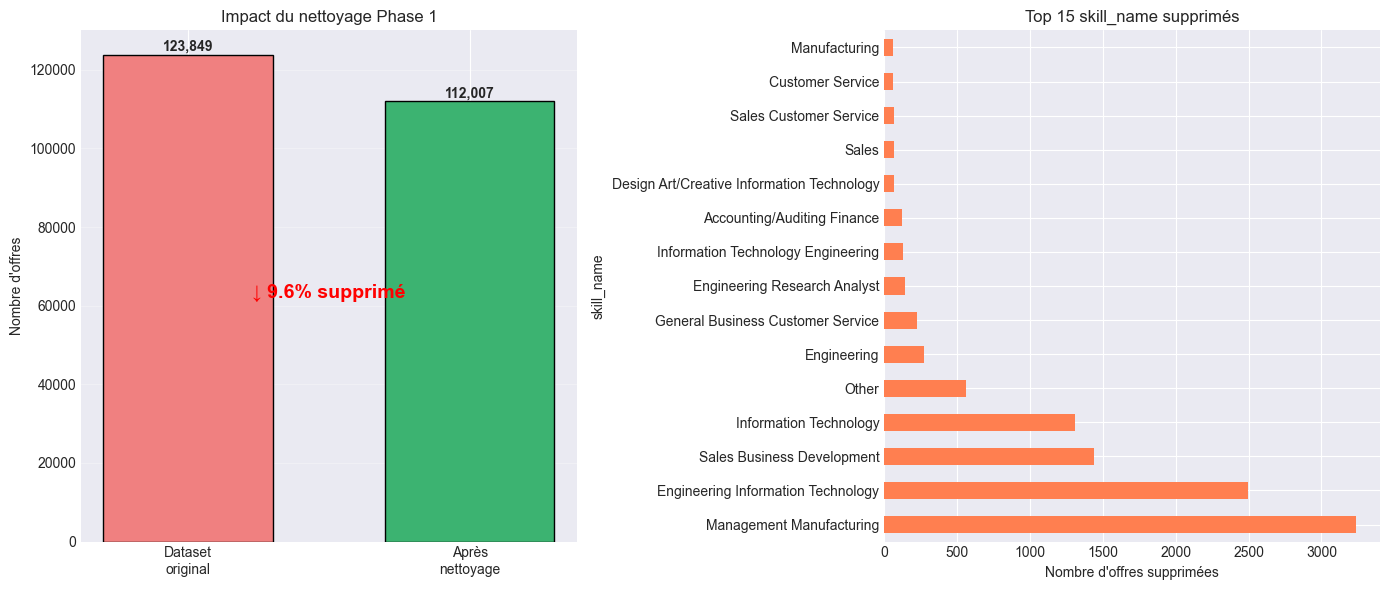

In [14]:
print("\n" + "=" * 80)
print("PHASE 1 : NETTOYAGE GLOBAL SAFE (avant filtrage Healthcare)")
print("=" * 80)

# Sauvegarder l'original
df_original = df.copy()
print(f"📊 Dataset original : {len(df_original):,} offres")

# ============================================================================
# ÉTAPE 1 : IDENTIFIER LES DOMAINES CLAIREMENT NON-HEALTHCARE
# ============================================================================

print("\n" + "-" * 80)
print("1️⃣ IDENTIFICATION DES DOMAINES NON-HEALTHCARE")
print("-" * 80)

# Domaines clairement incompatibles avec Healthcare
non_healthcare_domains = [
    # IT/Tech pur (pas de lien médical)
    'Software Development Information Technology',
    'Network/Systems Administration Information Technology',
    'Database Administration Information Technology',
    'Web Development Information Technology',
    
    # Manufacturing/Industrial pur
    'Skilled Labor Manufacturing',
    'Production Manufacturing',
    'Quality Assurance Manufacturing',
    
    # Retail/Commerce
    'Retail Sales',
    'Customer Service Retail',
    
    # Construction
    'Construction',
    'Electrician',
    'Plumber',
    'Carpentry',
    
    # Autres domaines sans lien
    'Real Estate',
    'Hospitality/Tourism',
    'Transportation',
    'Agriculture'
]

# Vérifier combien seraient supprimés
potentially_removed = df[df['skill_name'].isin(non_healthcare_domains)]
print(f"⚠️ Offres avec skill_name clairement non-Healthcare : {len(potentially_removed):,}")

if len(potentially_removed) > 0:
    print(f"\n📋 Top 10 de ces domaines :")
    print(potentially_removed['skill_name'].value_counts().head(10))
else:
    print("✅ Aucun domaine explicitement non-Healthcare trouvé dans la liste")

# ============================================================================
# ÉTAPE 2 : VÉRIFIER LES TITRES EXPLICITEMENT NON-HEALTHCARE
# ============================================================================

print("\n" + "-" * 80)
print("2️⃣ IDENTIFICATION PAR TITRES EXPLICITES")
print("-" * 80)

# Mots-clés qui indiquent CLAIREMENT un job non-Healthcare
non_healthcare_keywords = [
    # IT/Software
    'software engineer', 'developer', 'programmer', 'devops', 'full stack',
    'front end', 'backend', 'web developer', 'mobile developer', 'data scientist',
    'machine learning', 'ai engineer', 'cloud engineer', 'cybersecurity',
    
    # Manufacturing/Industrial
    'forklift', 'warehouse', 'assembly', 'production worker', 'machinist',
    'welder', 'fabricator', 'cnc', 'quality inspector',
    
    # Construction
    'electrician', 'plumber', 'carpenter', 'hvac technician', 'roofer',
    'construction worker', 'painter', 'mason',
    
    # Retail/Service
    'cashier', 'retail associate', 'sales associate', 'barista',
    'server', 'bartender', 'cook', 'chef',
    
    # Transport/Logistics
    'truck driver', 'delivery driver', 'dispatcher', 'logistics coordinator',
    
    # Finance/Accounting (pur - pas healthcare related)
    'investment banker', 'stock broker', 'tax accountant', 'auditor'
]

# Créer pattern
non_hc_pattern = '|'.join(non_healthcare_keywords)

# Identifier
df['clearly_not_healthcare'] = df['title'].astype(str).str.lower().str.contains(
    non_hc_pattern, 
    regex=True, 
    na=False
)

clearly_not_hc = df[df['clearly_not_healthcare'] == True]
print(f"⚠️ Offres avec titres clairement non-Healthcare : {len(clearly_not_hc):,}")

# Exemples
if len(clearly_not_hc) > 0:
    print(f"\n📋 EXEMPLES (pour validation) :")
    samples = clearly_not_hc.sample(min(10, len(clearly_not_hc)), random_state=42)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"{i:2d}. {row['title']:60s} ({row['skill_name']})")

# ============================================================================
# ÉTAPE 3 : COMBINER LES CRITÈRES SAFE
# ============================================================================

print("\n" + "-" * 80)
print("3️⃣ COMBINAISON DES CRITÈRES SAFE")
print("-" * 80)

# Offres à SUPPRIMER avec haute confiance
df['safe_to_remove'] = (
    (df['skill_name'].isin(non_healthcare_domains)) |
    (df['clearly_not_healthcare'] == True)
)

safe_to_remove = df[df['safe_to_remove'] == True]
print(f"📊 Total offres SAFE à supprimer : {len(safe_to_remove):,} ({len(safe_to_remove)/len(df)*100:.2f}%)")

# Distribution de ce qu'on va supprimer
print(f"\n📋 Top 15 skill_name des offres à supprimer :")
print(safe_to_remove['skill_name'].value_counts().head(15))

# ============================================================================
# ÉTAPE 4 : VÉRIFICATION DE SÉCURITÉ (pas de collision Healthcare)
# ============================================================================

print("\n" + "-" * 80)
print("4️⃣ VÉRIFICATION DE SÉCURITÉ - Collision Healthcare ?")
print("-" * 80)

# Combien d'offres "safe_to_remove" contiennent quand même des keywords Healthcare ?
collision_check = safe_to_remove[
    (safe_to_remove['healthcare_in_title'] == True) |
    (safe_to_remove['skill_name'] == 'Health Care Provider')
]

print(f"⚠️ COLLISIONS DÉTECTÉES : {len(collision_check)}")

if len(collision_check) > 0:
    print(f"\n🚨 ATTENTION - Exemples de collisions (à examiner) :")
    collision_samples = collision_check.sample(min(10, len(collision_check)), random_state=42)
    
    for i, (idx, row) in enumerate(collision_samples.iterrows(), 1):
        print(f"\n   COLLISION #{i}")
        print(f"   Title      : {row['title']}")
        print(f"   Skill_name : {row['skill_name']}")
        print(f"   Pourquoi flagué non-HC : {row['title'][:100]}...")
else:
    print("✅ AUCUNE COLLISION - Safe de supprimer ces offres")

# ============================================================================
# ÉTAPE 5 : STATISTIQUES AVANT/APRÈS
# ============================================================================

print("\n" + "=" * 80)
print("📊 BILAN DE NETTOYAGE PHASE 1")
print("=" * 80)

df_cleaned = df[df['safe_to_remove'] == False].copy()

print(f"\n{'Métrique':<40} {'Avant':>15} {'Après':>15} {'Différence':>15}")
print("-" * 85)
print(f"{'Total offres':<40} {len(df_original):>15,} {len(df_cleaned):>15,} {len(df_original)-len(df_cleaned):>15,}")
print(f"{'Locations uniques':<40} {df_original['location'].nunique():>15,} {df_cleaned['location'].nunique():>15,} {df_original['location'].nunique()-df_cleaned['location'].nunique():>15,}")
print(f"{'skill_name uniques':<40} {df_original['skill_name'].nunique():>15,} {df_cleaned['skill_name'].nunique():>15,} {df_original['skill_name'].nunique()-df_cleaned['skill_name'].nunique():>15,}")

# Healthcare dans le dataset nettoyé ?
healthcare_cleaned = df_cleaned[
    (df_cleaned['healthcare_in_title'] == True) |
    (df_cleaned['skill_name'] == 'Health Care Provider')
]

print(f"{'Offres Healthcare (titre+skill)':<40} {'-':>15} {len(healthcare_cleaned):>15,} {'-':>15}")

print("\n" + "=" * 80)
print("✅ PHASE 1 TERMINÉE - Prêt pour validation")
print("=" * 80)

# ============================================================================
# VISUALISATION
# ============================================================================

print("\n📊 Génération des graphiques...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Avant/Après
categories = ['Dataset\noriginal', 'Après\nnettoyage']
counts = [len(df_original), len(df_cleaned)]
colors = ['lightcoral', 'mediumseagreen']

axes[0].bar(categories, counts, color=colors, edgecolor='black', width=0.6)
axes[0].set_ylabel('Nombre d\'offres')
axes[0].set_title('Impact du nettoyage Phase 1')
axes[0].grid(axis='y', alpha=0.3)

for i, count in enumerate(counts):
    axes[0].text(i, count + 1000, f'{count:,}', ha='center', fontweight='bold')
    
# Ajouter le % supprimé
removed_pct = ((len(df_original) - len(df_cleaned)) / len(df_original)) * 100
axes[0].text(0.5, max(counts) * 0.5, f'↓ {removed_pct:.1f}% supprimé', 
             ha='center', fontsize=14, color='red', fontweight='bold')

# Graph 2: Top skill_name supprimés
if len(safe_to_remove) > 0:
    top_removed = safe_to_remove['skill_name'].value_counts().head(15)
    top_removed.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_xlabel('Nombre d\'offres supprimées')
    axes[1].set_title('Top 15 skill_name supprimés')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

In [15]:
print("\n" + "=" * 80)
print("PROTECTION DES COLLISIONS - Tri intelligent")
print("=" * 80)

# Récupérer les 521 collisions
collisions = df[
    (df['safe_to_remove'] == True) &
    ((df['healthcare_in_title'] == True) | (df['skill_name'] == 'Health Care Provider'))
]

print(f"📊 Collisions à examiner : {len(collisions)}")

# Analyser les collisions par catégorie
print("\n🔍 ANALYSE DES COLLISIONS :")

# Catégorie 1 : Medical/Hospital dans le titre
medical_support = collisions[
    collisions['title'].str.lower().str.contains(
        'medical|hospital|clinical|healthcare|health care',
        regex=True,
        na=False
    )
]

print(f"\n✅ CATÉGORIE 1 - Medical/Hospital Support ({len(medical_support)} offres)")
print(f"   Exemples : {medical_support['title'].head(5).tolist()}")
print(f"   → DÉCISION : GARDER (ce sont des jobs Healthcare support)")

# Catégorie 2 : Device/Equipment/Pharma
device_related = collisions[
    collisions['title'].str.lower().str.contains(
        'device|equipment|pharmaceutical|pharma|biotech|diagnostic',
        regex=True,
        na=False
    )
]

print(f"\n✅ CATÉGORIE 2 - Medical Device/Equipment ({len(device_related)} offres)")
print(f"   Exemples : {device_related['title'].head(5).tolist()}")
print(f"   → DÉCISION : GARDER (industrie médicale)")

# Catégorie 3 : Tech générique (Machine Learning, Software, etc.)
generic_tech = collisions[
    ~collisions['job_id'].isin(medical_support['job_id']) &
    ~collisions['job_id'].isin(device_related['job_id'])
]

print(f"\n⚠️ CATÉGORIE 3 - Tech générique ({len(generic_tech)} offres)")
if len(generic_tech) > 0:
    print(f"   Exemples : {generic_tech['title'].head(5).tolist()}")
    print(f"   → DÉCISION : EXAMINER manuellement (zone grise)")

# Mettre à jour le filtrage
df['final_keep'] = True

# Supprimer SAUF les collisions medical/device
df.loc[
    (df['safe_to_remove'] == True) &
    ~(df['job_id'].isin(medical_support['job_id'])) &
    ~(df['job_id'].isin(device_related['job_id'])),
    'final_keep'
] = False

df_smart_cleaned = df[df['final_keep'] == True].copy()

print("\n" + "=" * 80)
print("📊 BILAN SMART CLEANING")
print("=" * 80)
print(f"Dataset original          : {len(df):,}")
print(f"Après nettoyage basique   : {len(df_cleaned):,} (supprimé {len(df) - len(df_cleaned):,})")
print(f"Après protection collisions: {len(df_smart_cleaned):,} (supprimé {len(df) - len(df_smart_cleaned):,})")
print(f"Collisions protégées      : {len(medical_support) + len(device_related):,}")


PROTECTION DES COLLISIONS - Tri intelligent
📊 Collisions à examiner : 521

🔍 ANALYSE DES COLLISIONS :

✅ CATÉGORIE 1 - Medical/Hospital Support (38 offres)
   Exemples : ['Delivery Driver - Medical Equipment', 'Emergency Medical Dispatcher/UKHC', 'Clinical Adoption Data Scientist', 'Clinical Statistical (SAS) Programmer', 'Senior Healthcare Compliance Auditor (Client Facing) - Remote in MA']
   → DÉCISION : GARDER (ce sont des jobs Healthcare support)

✅ CATÉGORIE 2 - Medical Device/Equipment (23 offres)
   Exemples : ['Delivery Driver - Medical Equipment', 'Lead Software Engineer – Pharmacy Core Platform', 'Delivery Driver - Medical Equipment', 'Delivery Driver - Medical Equipment', 'Delivery Driver - Medical Equipment']
   → DÉCISION : GARDER (industrie médicale)

⚠️ CATÉGORIE 3 - Tech générique (477 offres)
   Exemples : ['Journeyman Electrician', 'Journeyman Electrician', 'Senior Machine Learning Research Engineer', 'Learning Experience Designer/Developer II', 'Android Developer I

In [16]:
print("\n" + "=" * 80)
print("FILTRAGE HEALTHCARE FINAL - 3 NIVEAUX")
print("=" * 80)

# Sur le dataset smart_cleaned
healthcare_high = df_smart_cleaned[
    (df_smart_cleaned['skill_name'] == 'Health Care Provider') &
    (df_smart_cleaned['healthcare_in_title'] == True)
]

healthcare_medium = df_smart_cleaned[
    ((df_smart_cleaned['skill_name'] == 'Health Care Provider') |
     (df_smart_cleaned['healthcare_in_title'] == True)) &
    ~(df_smart_cleaned['job_id'].isin(healthcare_high['job_id']))
]

# Medical support (collisions protégées)
healthcare_support = df_smart_cleaned[
    df_smart_cleaned['job_id'].isin(
        list(medical_support['job_id']) + list(device_related['job_id'])
    )
]

print(f"\n🟢 HIGH confidence    : {len(healthcare_high):,} offres")
print(f"   (skill_name = Healthcare ET titre contient keywords)")

print(f"\n🟡 MEDIUM confidence  : {len(healthcare_medium):,} offres")
print(f"   (skill_name = Healthcare OU titre contient keywords)")

print(f"\n🔵 SUPPORT jobs      : {len(healthcare_support):,} offres")
print(f"   (Medical device, hospital support, equipment)")

# Dataset final recommandé
healthcare_final = pd.concat([
    healthcare_high,
    healthcare_medium,
    healthcare_support
]).drop_duplicates(subset=['job_id'])

print(f"\n✅ TOTAL HEALTHCARE FINAL : {len(healthcare_final):,} offres")
print(f"   ({len(healthcare_final) / len(df_smart_cleaned) * 100:.2f}% du dataset nettoyé)")


FILTRAGE HEALTHCARE FINAL - 3 NIVEAUX

🟢 HIGH confidence    : 12,924 offres
   (skill_name = Healthcare ET titre contient keywords)

🟡 MEDIUM confidence  : 11,187 offres
   (skill_name = Healthcare OU titre contient keywords)

🔵 SUPPORT jobs      : 44 offres
   (Medical device, hospital support, equipment)

✅ TOTAL HEALTHCARE FINAL : 24,111 offres
   (21.52% du dataset nettoyé)


In [17]:
print("\n" + "=" * 80)
print("SAUVEGARDE DU DATASET HEALTHCARE FINAL")
print("=" * 80)

# Dataset final : HIGH + MEDIUM + SUPPORT
healthcare_final_df = healthcare_final.copy()

# Sélectionner les colonnes utiles
columns_to_keep = [
    'job_id',
    'title',
    'description',
    'location',
    'formatted_experience_level',
    'skill_name'
]

healthcare_final_clean = healthcare_final_df[columns_to_keep].copy()

# Ajouter une colonne "confidence_level" pour traçabilité
healthcare_final_clean['confidence_level'] = 'Unknown'

# Marquer les niveaux de confiance
healthcare_final_clean.loc[
    healthcare_final_clean['job_id'].isin(healthcare_high['job_id']),
    'confidence_level'
] = 'High'

healthcare_final_clean.loc[
    healthcare_final_clean['job_id'].isin(healthcare_medium['job_id']),
    'confidence_level'
] = 'Medium'

healthcare_final_clean.loc[
    healthcare_final_clean['job_id'].isin(healthcare_support['job_id']),
    'confidence_level'
] = 'Support'

# Statistiques finales
print(f"\n📊 STATISTIQUES DU DATASET FINAL :")
print(f"{'='*80}")
print(f"Total offres              : {len(healthcare_final_clean):,}")
print(f"Locations uniques         : {healthcare_final_clean['location'].nunique():,}")
print(f"Titres uniques            : {healthcare_final_clean['title'].nunique():,}")

print(f"\n📊 Répartition par niveau de confiance :")
conf_dist = healthcare_final_clean['confidence_level'].value_counts()
for level, count in conf_dist.items():
    pct = (count / len(healthcare_final_clean)) * 100
    print(f"   {level:10s} : {count:6,} ({pct:5.2f}%)")

print(f"\n📊 Répartition par niveau d'expérience :")
exp_dist = healthcare_final_clean['formatted_experience_level'].value_counts()
for level, count in exp_dist.items():
    pct = (count / len(healthcare_final_clean)) * 100
    print(f"   {str(level):25s} : {count:6,} ({pct:5.2f}%)")

print(f"\n📊 Top 10 locations :")
top_locs = healthcare_final_clean['location'].value_counts().head(10)
for loc, count in top_locs.items():
    print(f"   {loc:35s} : {count:5,}")

print(f"\n📊 Qualité des descriptions :")
desc_lengths = healthcare_final_clean['description'].astype(str).apply(lambda x: len(x.split()))
print(f"   Moyenne mots    : {desc_lengths.mean():.0f}")
print(f"   Médiane mots    : {desc_lengths.median():.0f}")
print(f"   Min mots        : {desc_lengths.min():.0f}")
print(f"   Max mots        : {desc_lengths.max():.0f}")

# Sauvegarder
output_path = '../data/processed/healthcare_jobs_final.csv'
healthcare_final_clean.to_csv(output_path, index=False)

print(f"\n{'='*80}")
print(f"✅ DATASET SAUVEGARDÉ : {output_path}")
print(f"{'='*80}")

# Aperçu
print(f"\n📋 APERÇU DES 5 PREMIÈRES OFFRES :")
print(healthcare_final_clean[['job_id', 'title', 'location', 'confidence_level']].head(10))

print("\n" + "=" * 80)
print("🎉 PHASE EXPLORATION + NETTOYAGE TERMINÉE !")
print("=" * 80)
print("\n✅ Prêt pour Phase 2 : Préparation SBERT")


SAUVEGARDE DU DATASET HEALTHCARE FINAL

📊 STATISTIQUES DU DATASET FINAL :
Total offres              : 24,111
Locations uniques         : 4,042
Titres uniques            : 15,252

📊 Répartition par niveau de confiance :
   High       : 12,922 (53.59%)
   Medium     : 11,145 (46.22%)
   Support    :     44 ( 0.18%)

📊 Répartition par niveau d'expérience :
   Entry level               :  7,769 (32.22%)
   Mid-Senior level          :  7,376 (30.59%)
   Associate                 :  1,081 ( 4.48%)
   Internship                :    975 ( 4.04%)
   Director                  :    486 ( 2.02%)
   Executive                 :    138 ( 0.57%)

📊 Top 10 locations :
   United States                       :   824
   New York, NY                        :   303
   Chicago, IL                         :   235
   Boston, MA                          :   235
   Houston, TX                         :   204
   Dallas, TX                          :   190
   Los Angeles, CA                     :   189
   Charlot

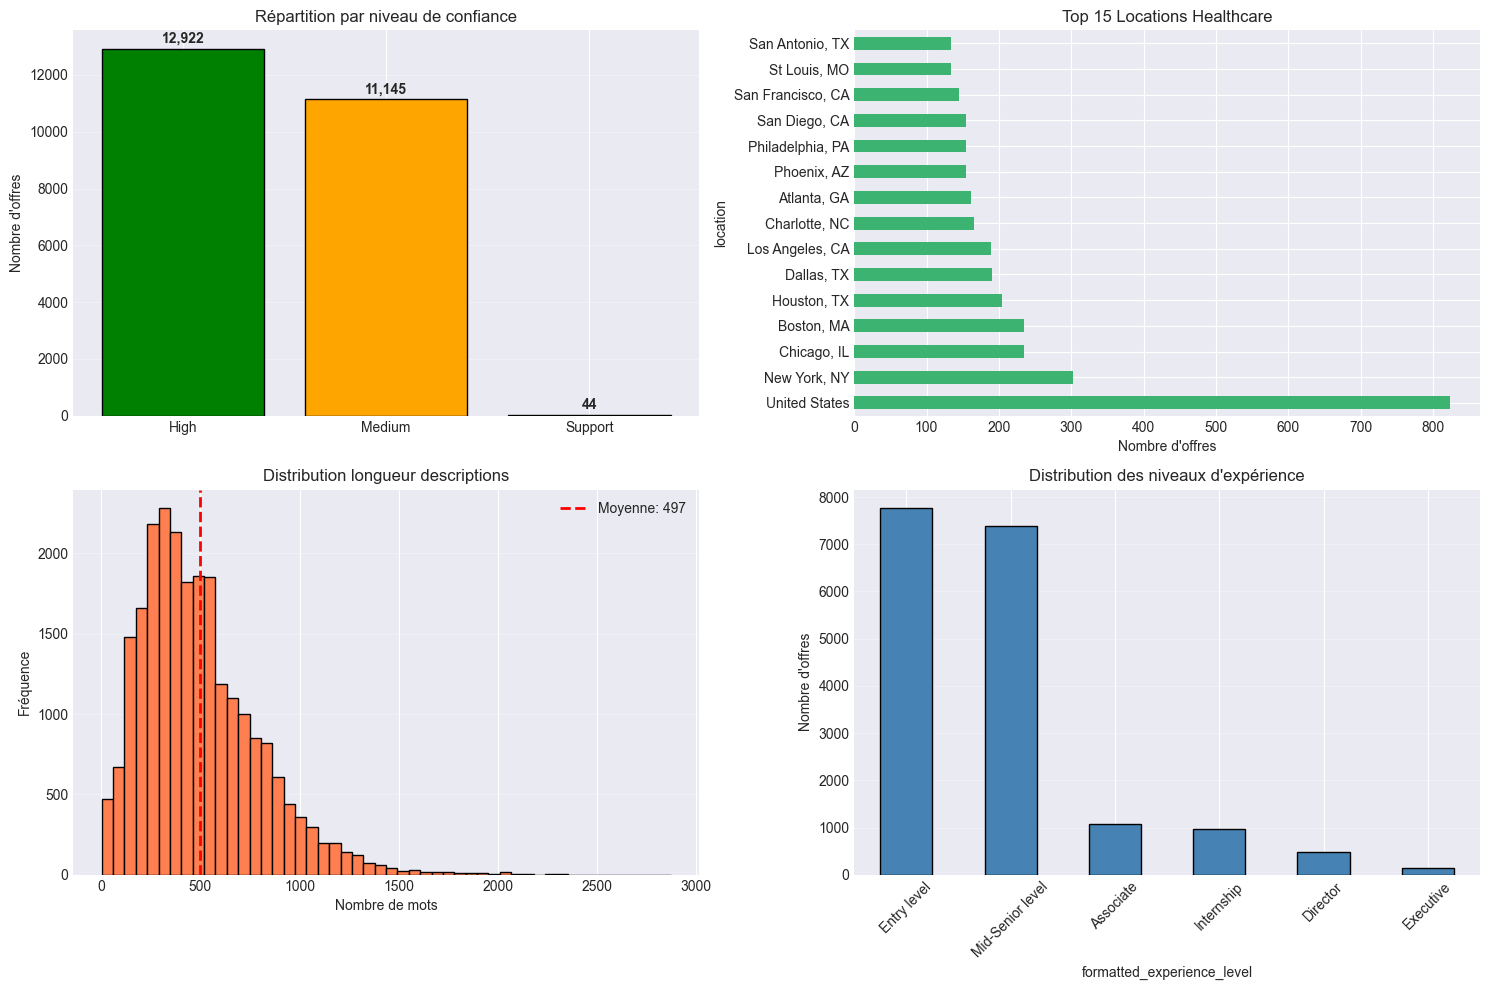

✅ Visualisations générées !


In [18]:
# Visualisation finale du dataset Healthcare
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graph 1: Répartition par confidence
conf_counts = healthcare_final_clean['confidence_level'].value_counts()
colors_conf = {'High': 'green', 'Medium': 'orange', 'Support': 'steelblue'}
conf_colors = [colors_conf.get(x, 'gray') for x in conf_counts.index]

axes[0, 0].bar(conf_counts.index, conf_counts.values, color=conf_colors, edgecolor='black')
axes[0, 0].set_ylabel('Nombre d\'offres')
axes[0, 0].set_title('Répartition par niveau de confiance')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (level, count) in enumerate(conf_counts.items()):
    axes[0, 0].text(i, count + 200, f'{count:,}', ha='center', fontweight='bold')

# Graph 2: Top 15 locations
top_locs = healthcare_final_clean['location'].value_counts().head(15)
top_locs.plot(kind='barh', ax=axes[0, 1], color='mediumseagreen')
axes[0, 1].set_xlabel('Nombre d\'offres')
axes[0, 1].set_title('Top 15 Locations Healthcare')

# Graph 3: Distribution des longueurs
desc_lengths = healthcare_final_clean['description'].astype(str).apply(lambda x: len(x.split()))
axes[1, 0].hist(desc_lengths, bins=50, color='coral', edgecolor='black')
axes[1, 0].axvline(desc_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {desc_lengths.mean():.0f}')
axes[1, 0].set_xlabel('Nombre de mots')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution longueur descriptions')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Graph 4: Niveaux d'expérience
exp_counts = healthcare_final_clean['formatted_experience_level'].value_counts()
exp_counts.plot(kind='bar', ax=axes[1, 1], color='steelblue', edgecolor='black')
axes[1, 1].set_ylabel('Nombre d\'offres')
axes[1, 1].set_title('Distribution des niveaux d\'expérience')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualisations générées !")